# 📝 Exploratory Data Analysis (EDA) - Churn Prediction  
## 📌 Objective  
Perform an exploratory analysis on the customer dataset to understand churn patterns and key influencing factors.  

## 📂 Dataset  
- **Source**: Excel file (`WA_Fn-UseC_-Telco-Customer-Churn.csv`) can got it from kaggle
- **Location**: `../data/WA_Fn-UseC_-Telco-Customer-Churn.csv`  
- **Format**: `.csv`  
- **Key Variables**:  
  - `CustomerID`: Unique customer ID (to be removed as it is not relevant).  
  - `Gender`, `SeniorCitizen`, `Partner`, `Dependents`: Customer demographics.  
  - `Tenure`: Number of months the customer has been subscribed.  
  - `MonthlyCharges`, `TotalCharges`: Monthly and total charges.  
  - `Churn`: Whether the customer has churned (`Yes` / `No`).  

## 📊 Analysis Steps  
1. **Load the dataset** from the Excel file and display basic information.  
2. **Check for missing values**.  
3. **Summarize numerical data** using descriptive statistics.  
4. **Analyze churn rate** to understand customer retention.  
5. **Visualize churn distribution** using **Seaborn**.  

## 🛠️ Tools & Libraries  
- `pandas` → Read and analyze data.  
- `matplotlib & seaborn` → Data visualization.  

---

## 🔍 Load Data and Initial Exploration  


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
read_data = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")
EDA_data = read_data.copy()
EDA_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


get the data info

In [65]:
EDA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
EDA_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
EDA_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
EDA_data['TotalCharges'] = pd.to_numeric(EDA_data['TotalCharges'], errors='coerce')
EDA_data.drop(columns=['customerID'], inplace=True)
EDA_data_Clean = pd.get_dummies(EDA_data, drop_first=True)
EDA_data_Clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


no missing value, no wrong data type

next : 
- visualizing : 
    - Churn Distribution, and one for based on gender
    - tenure Historgram
    - monthly boxplot for charges vs churn
    - corelation heatmap between numeric variable
    - Churn by Contract Type
    - Churn by Payment Method
    - Churn by Fiber Optic Usage

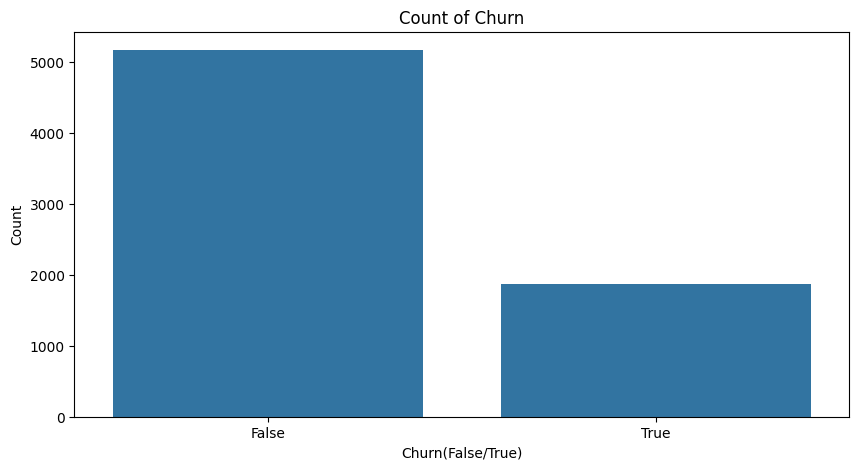

In [69]:
# visualizing the churn count

plt.figure(figsize=(10, 5))
sns.countplot(x="Churn_Yes", data = EDA_data_Clean)
plt.title("Count of Churn")
plt.xlabel("Churn(False/True)")
plt.ylabel("Count")
plt.show()

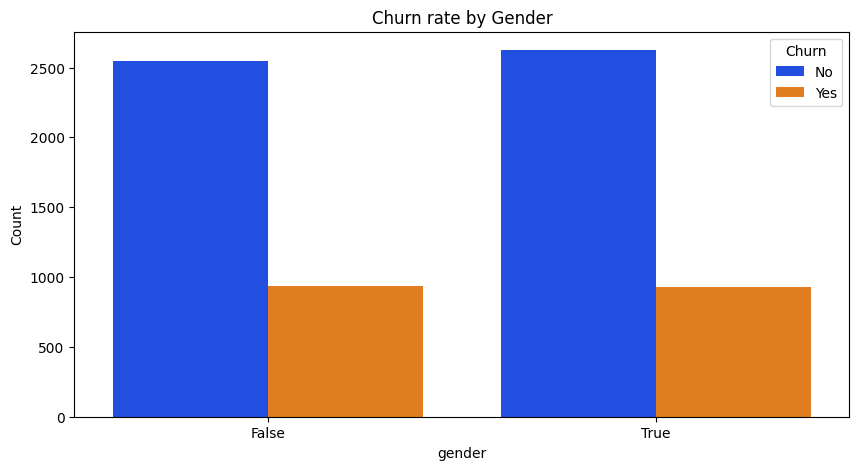

In [70]:
# Churn Distribution based on gender

plt.figure(figsize=(10, 5))
sns.countplot(x="gender_Male", hue="Churn_Yes", data=EDA_data_Clean, palette="bright")
plt.title("Churn rate by Gender") 
plt.xlabel("gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels= ["No", "Yes"], loc='upper right')
plt.show()

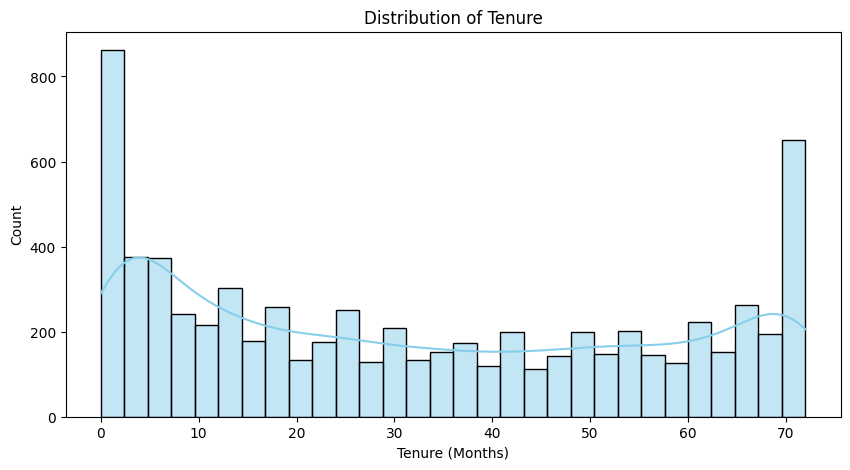

In [71]:
# Tenure Histogram 

plt.figure(figsize=(10, 5))
sns.histplot(EDA_data_Clean['tenure'], bins = 30, kde = True, color = "skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()



C:\Users\ANGELO\AppData\Local\Temp\ipykernel_5924\3042225145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Yes", y="MonthlyCharges", data=EDA_data_Clean, palette="coolwarm")


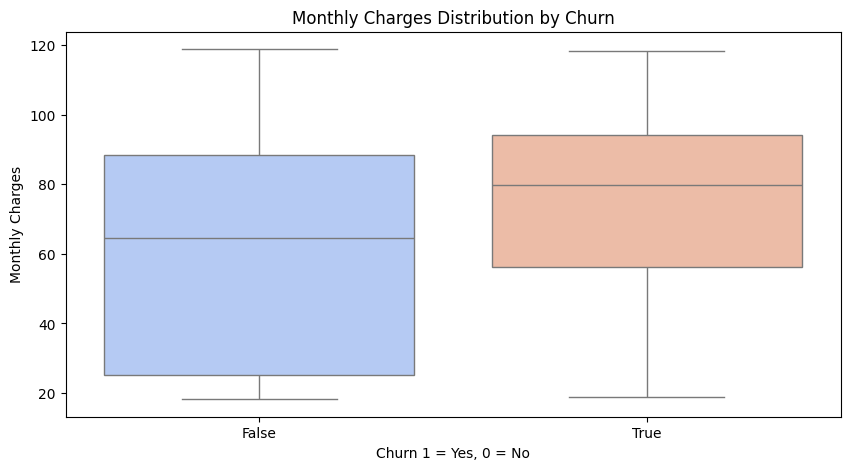

In [72]:
# boxplot for monthly charges

plt.figure(figsize=(10, 5))
sns.boxplot(x="Churn_Yes", y="MonthlyCharges", data=EDA_data_Clean, palette="coolwarm")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn 1 = Yes, 0 = No")
plt.ylabel("Monthly Charges")
plt.show()


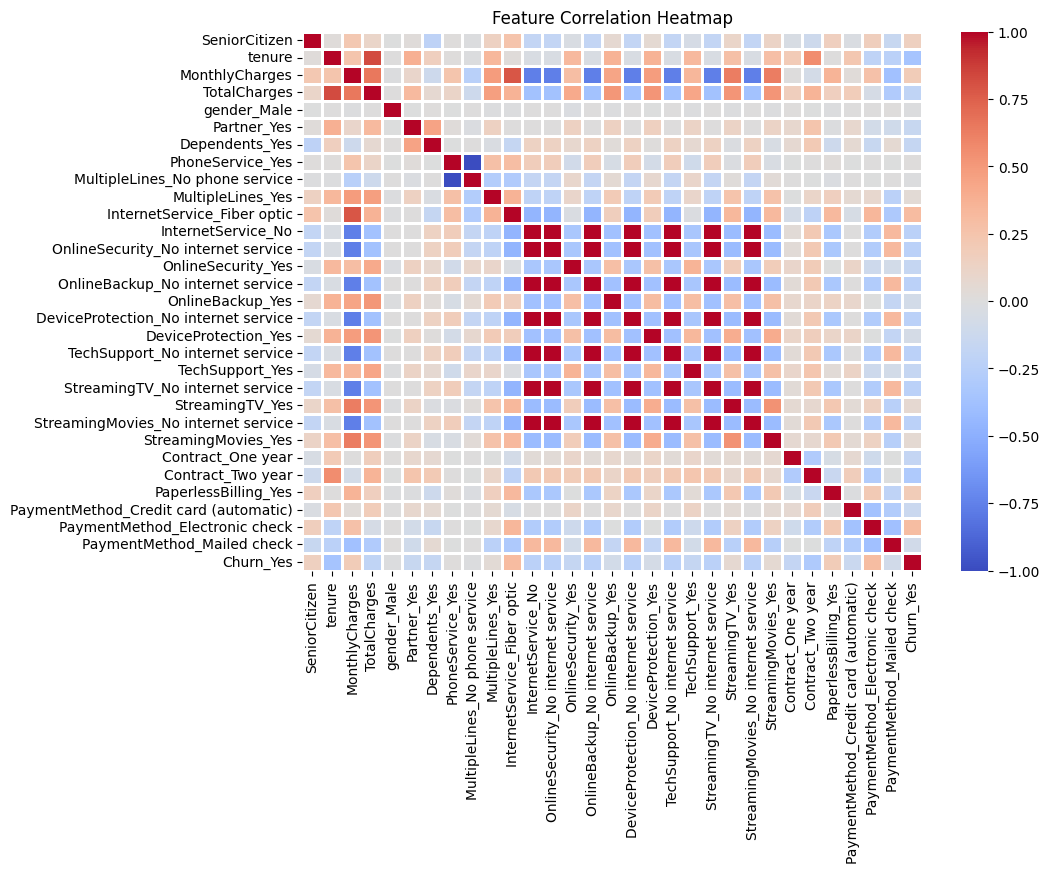

In [73]:
# heatmap correlation for numerical variable

plt.figure(figsize=(10, 7))
sns.heatmap(EDA_data_Clean.corr(), annot = False, cmap ="coolwarm", fmt = ".2f", linewidths=2)
plt.title("Feature Correlation Heatmap")
plt.show()

for the churn by contract type im gonna use the EDA_data not the EDA_data_Clean because its easier to see result with the EDA_data than the EDA_data_Clean

C:\Users\ANGELO\AppData\Local\Temp\ipykernel_5924\501231333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Contract", y="Churn", data=EDA_data, palette="viridis")


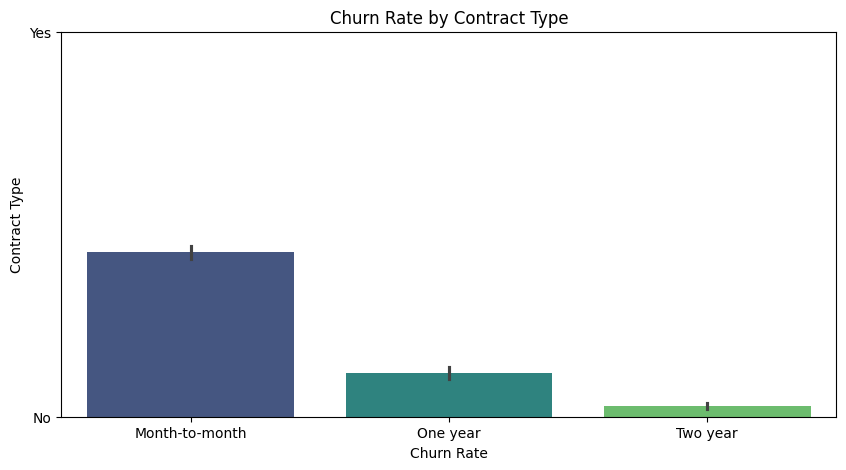

In [74]:
# Churn by Contract Type
plt.figure(figsize=(10, 5))
sns.barplot(x="Contract", y="Churn", data=EDA_data, palette="viridis")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Churn Rate")
plt.ylabel("Contract Type")
plt.ylim(0, 1)
plt.show()


<h2>Conclusion</h2>

the conclusion that we can get from the analysis that were done : 
1. Count Churn
    - majority of customers didnt churn (false), but little amount or some of it of them did churn (true)
    - the customers that still using the service is 2 times more than the churn
    
    this means even if there is churn, most of the customers still using and loyal to the services

2. Churn by Gender
    - not much difference given from the graph.
    - man/women has churn pattern relatively the same
    
    this means that churn factor is not based on gender but other variables.

3. Tenure Distribution 
    - The majority of customers have a very short subcription tenure
    - based on the graph some of the customers churn in the beginning of their subcription

    this means that Tenure is one of the variable that effect churn

4. Monthly Charge
    - customers that churn have more cost to pay monthly than the one that still using the service
    - the distibution shows that customers that have low cost to subscribe for the tenure tend to stay using than the one that pays more.
    
    this means that maybe the services that were given is not that enough for the customers that pay bigger cost.

5. heatmap 
    - the feature that correlate with churn is contract type, payment method, and other technical support like online security
    - churn has negative correlation with tenure, it means customers that stays longer tend to not churn
    - electronic payment method like "electronic check" has positive correlation with churn, that means customer that tend to churn use this payment method

6. Churn by Contract Type
    - customers that has a contracy type "Month to Month" have the highest churn possibility that the yearly contract
    - the longer the contract duration, the lowest the churn
    
    this shows that long term commintment from the customers that lower the churn possibility.


so to sum it up : 
- Churn is more influenced by factors such as contract type, monthly charges, and tenure, rather than by gender.
- New customers are more prone to churn, so it is important to have a good onboarding strategy.
- Customers with high monthly charges are more likely to churn, so there needs to be more flexible pricing packages.
- Long-term contracts reduce churn, so the company can encourage customers to switch to longer contracts with attractive incentives.



<h2>Data Prep</h2>

doing data prep here and saving the data that already prep so just do machine learning later.

In [ ]:
from sklearn.preprocessing import LabelEncoder

raed_data = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")
data_encode = read_data.copy()

data_encode.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
label_encoder = {}

for col in data_encode.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    
    # Konversi semua nilai dalam kolom ke string
    data_encode[col] = data_encode[col].astype(str)
    
    # Apply LabelEncoder
    data_encode[col] = le.fit_transform(data_encode[col])
    
    # Simpan encoder jika ingin decode kembali nanti
    label_encoder[col] = le  

data_encode.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [79]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [80]:
data_encode.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
data_encode.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [ ]:
data_encode.to_excel("preped_data.xlsx", index=False)

Data Prep & EDA Done.